# Project Summary

### In this job simulation, I tackled the challenge of customer churn prediction for a leading energy company. I began by conducting exploratory data analysis (EDA) to understand key factors influencing churn. Feature engineering was then employed to enrich the dataset with relevant predictors, such as contract duration and price differentials. Leveraging the Random Forest classifier, I developed a predictive model with 90% accuracy. My findings highlighted the importance of contract duration and price sensitivity in driving churn. Ultimately, my solution equips the client with actionable insights to proactively identify and retain at-risk customers, fostering sustained business growth and revenue preservation.

---

Let's start with EDA!

# Exploratory Data Analysis

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas a s pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

In [3]:
client_df = pd.read_csv('/kaggle/input/eda-bcg-forage-dataset/client_data (1).csv')
price_df = pd.read_csv('/kaggle/input/eda-bcg-forage-dataset/price_data (1).csv')

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that we're dealing with along with the data types of each column. The data types may dictate how we transform and engineer features.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart.

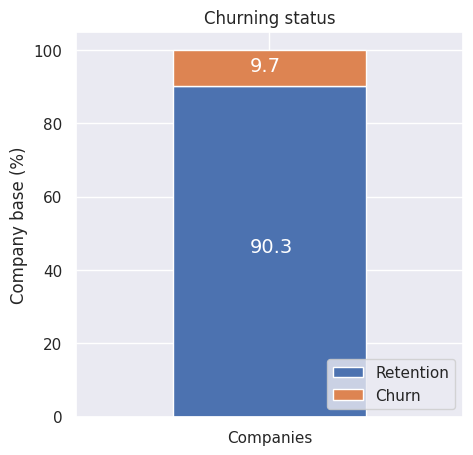

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column.

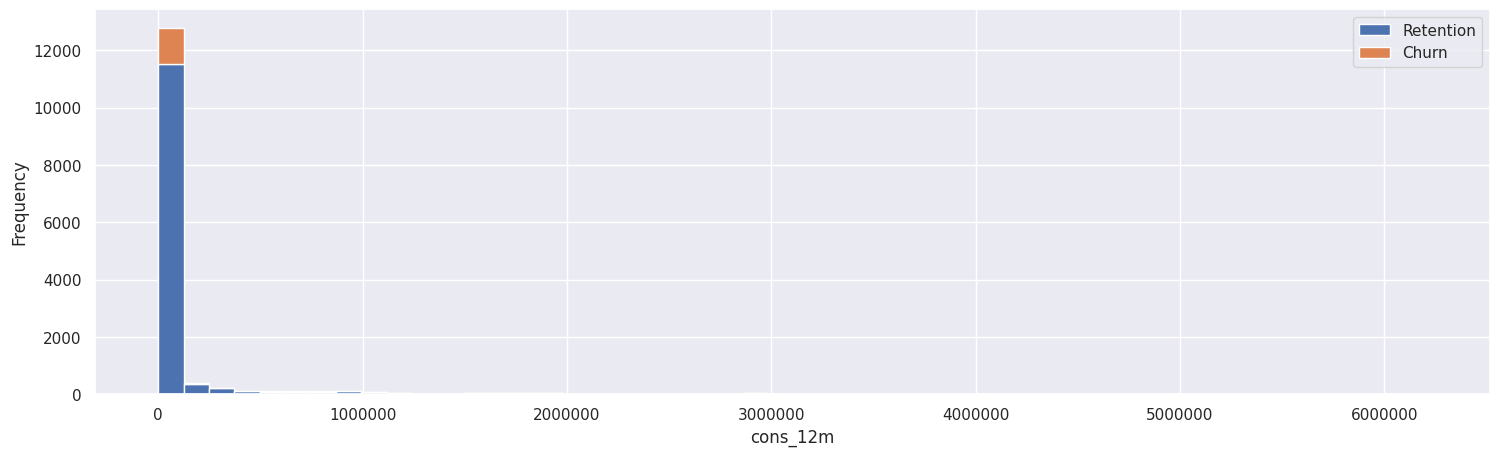

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

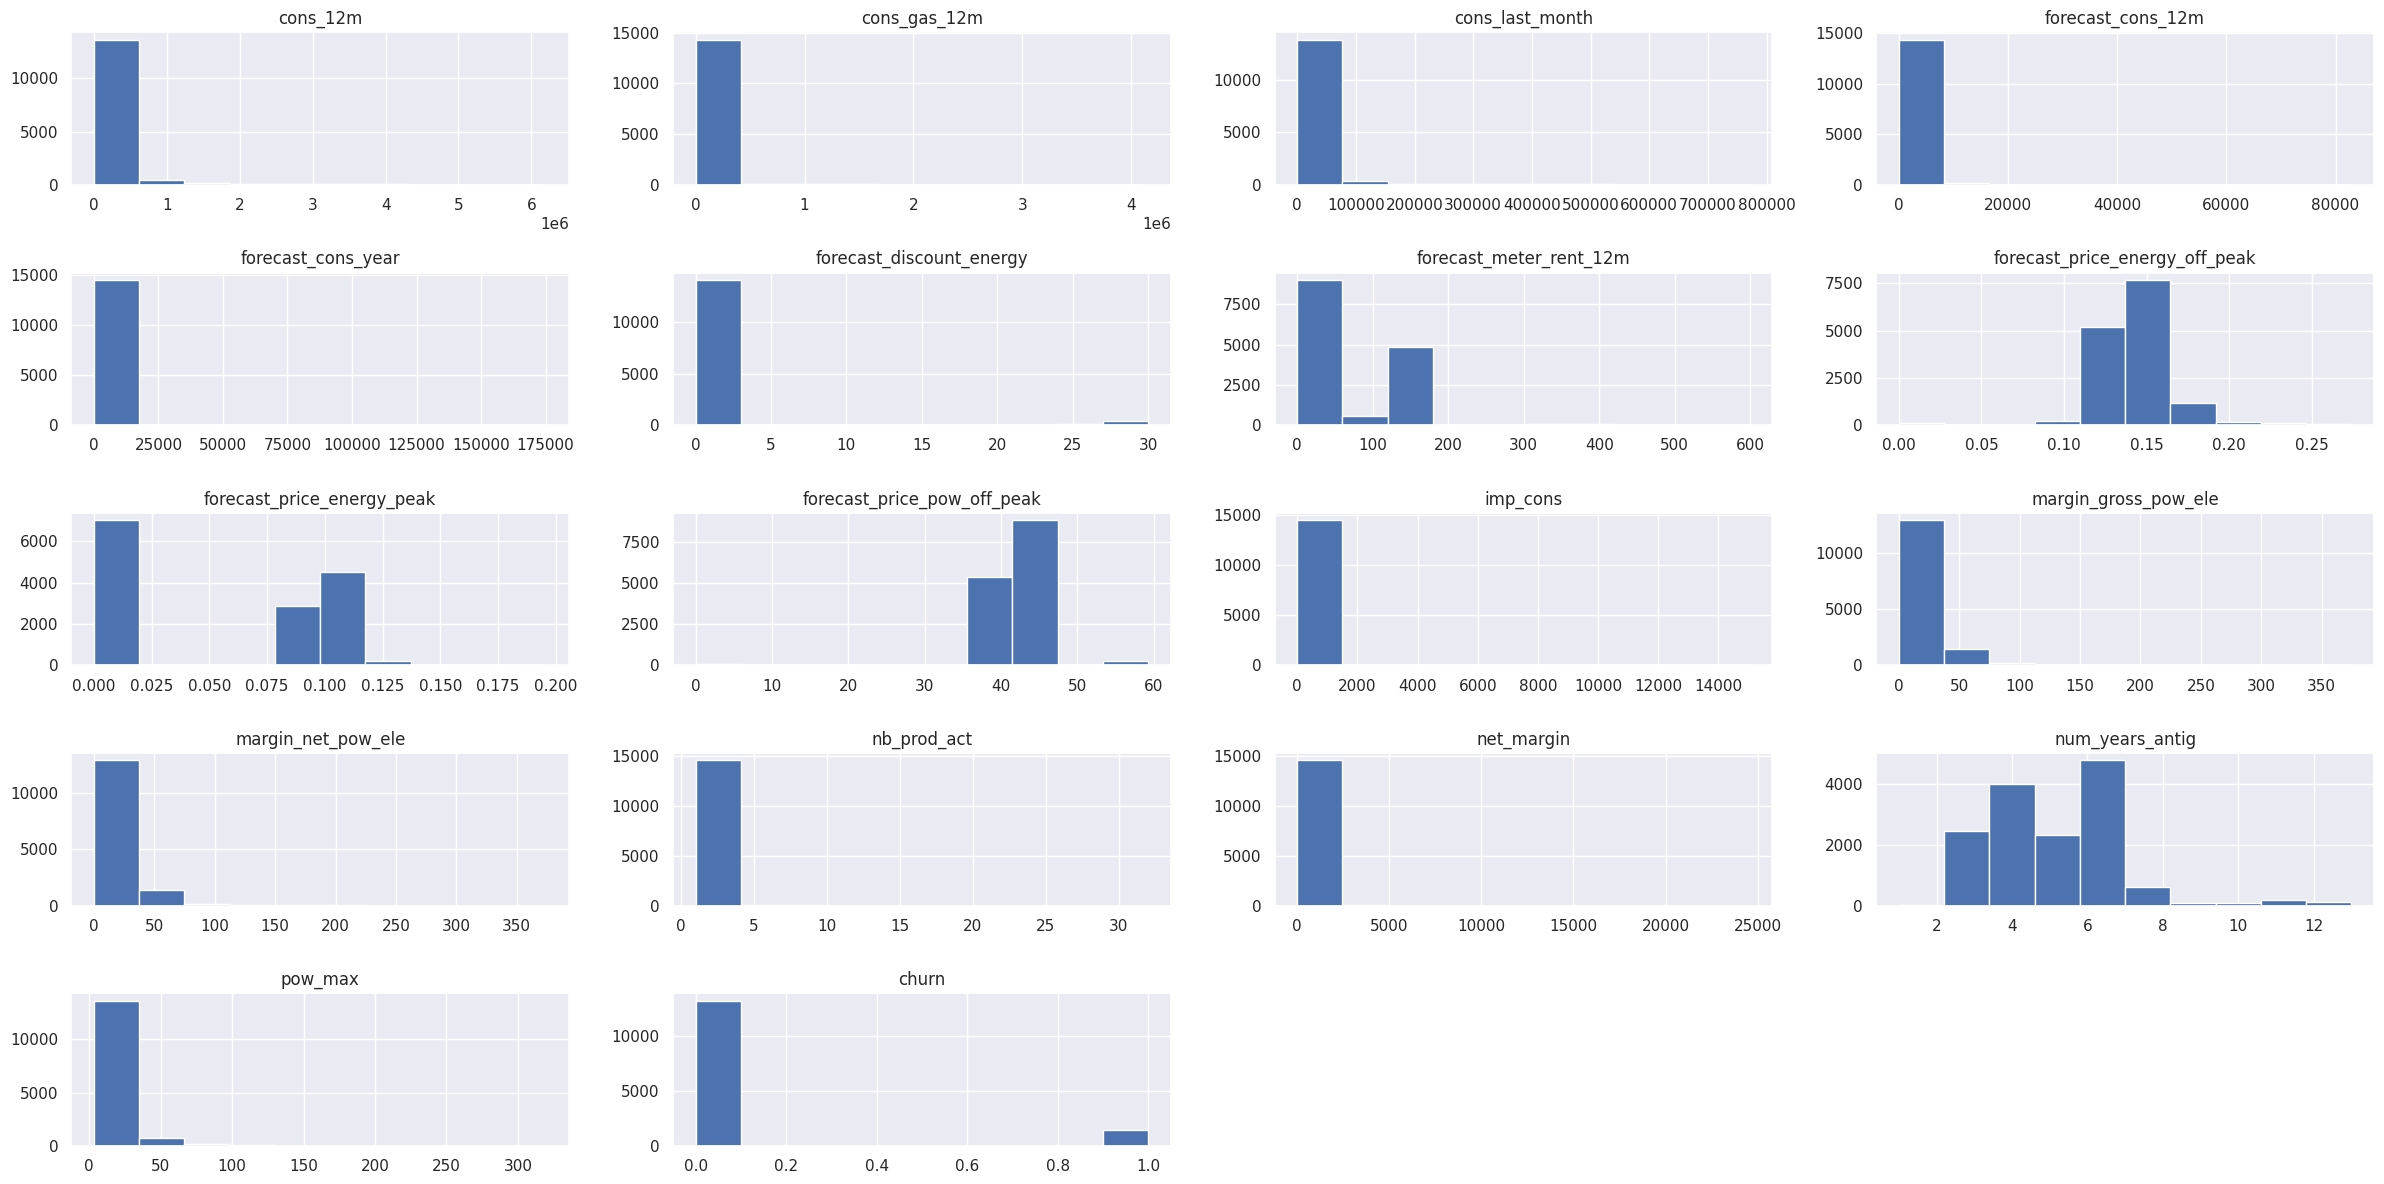

In [13]:
#Histogram

plt.rcParams["figure.figsize"] = [24,12]
plt.rcParams["figure.autolayout"] = True
client_df.hist()
plt.tight_layout()
plt.show()

In [14]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

## Analyzing Churn Status in Relation to Consumption

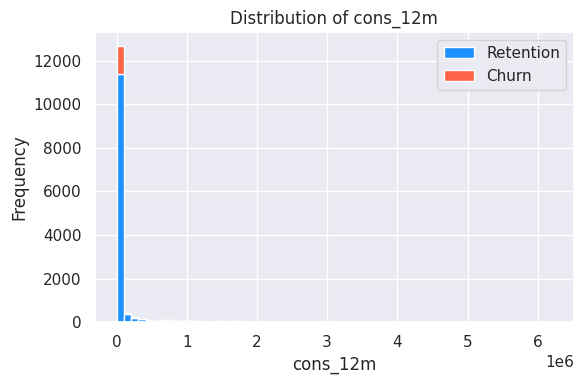

(0.0, 800000.0)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to plot histograms for distributions
def custom_distribution_plot(dataframe, column, ax, bins=60, palette=['dodgerblue', 'tomato']):
    """
    Plot variable distribution in a stacked histogram for churned and retained companies.
    """
    temp_df = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],
        "Churn": dataframe[dataframe["churn"] == 1][column]
    })

    ax = temp_df.plot(kind='hist', bins=bins, stacked=True, color=palette, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')
    plt.show()

# Load the datasets
client_df = pd.read_csv('/kaggle/input/eda-bcg-forage-dataset/client_data (1).csv')

# Select relevant columns for consumption analysis
consumption_df = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot distribution of 'cons_12m'
custom_distribution_plot(consumption_df, 'cons_12m', ax)
ax.set_xlim(0, 800000)


In [16]:
#merging client and price data
merged_df = pd.merge(price_df, client_df, on = "id", how = "inner")
merged_df["price_sensitivity"] = merged_df["price_off_peak_var"] / merged_df["cons_12m"]

In [17]:
merged_df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_sensitivity'],
      dtype='object')

In [18]:
merged_df["id"] = merged_df["id"].astype("category")
merged_df["has_gas"] = merged_df["has_gas"].astype("category")
merged_df["origin_up"] = merged_df["origin_up"].astype("category")
merged_df["channel_sales"] = merged_df["channel_sales"].astype("category")

In [19]:
merged_df["price_date"] = pd.to_datetime(merged_df["price_date"])
merged_df["date_activ"] = pd.to_datetime(merged_df["date_activ"])
merged_df["date_end"] = pd.to_datetime(merged_df["date_end"])
merged_df["date_modif_prod"] = pd.to_datetime(merged_df["date_modif_prod"])
merged_df["date_renewal"] = pd.to_datetime(merged_df["date_renewal"])

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  category      
 1   price_date                      175149 non-null  datetime64[ns]
 2   price_off_peak_var              175149 non-null  float64       
 3   price_peak_var                  175149 non-null  float64       
 4   price_mid_peak_var              175149 non-null  float64       
 5   price_off_peak_fix              175149 non-null  float64       
 6   price_peak_fix                  175149 non-null  float64       
 7   price_mid_peak_fix              175149 non-null  float64       
 8   channel_sales                   175149 non-null  category      
 9   cons_12m                        175149 non-null  int64         
 10  cons_gas_12m                    175149 non-null  int64  

In [21]:
unique_values = client_df['channel_sales'].unique()
print(unique_values)
merged_df.describe(include="category")

['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']


,id,channel_sales,has_gas,origin_up
count,175149,175149,175149,175149
unique,14606,8,2,6
top,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,12,80971,143364,85086


## Churn Status in Relation to Channel Sales

In [22]:
channel = client_df[["id", "channel_sales", "churn"]]
channel = channel.groupby([channel['channel_sales'], channel['churn'] ])['id'].count().unstack(level = 1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis = 0) * 100).sort_values(by= [1] , ascending = False)

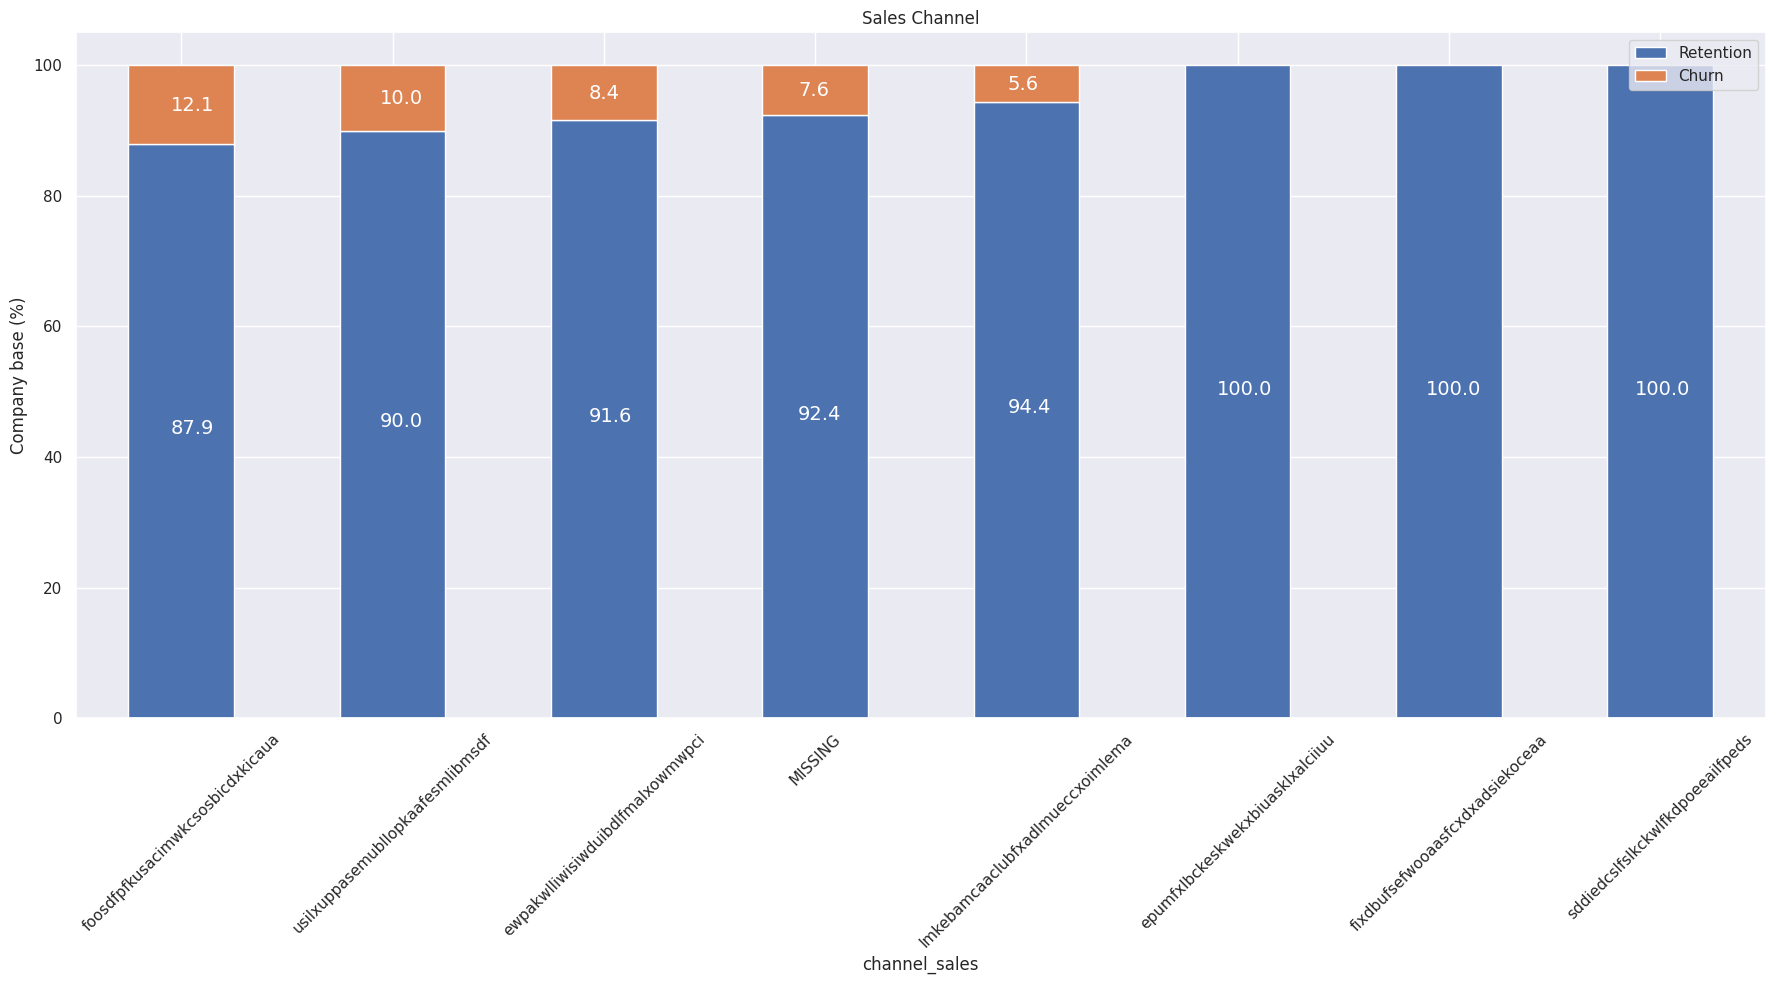

In [23]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_= 45)

## Distribution Plots for Monthly and Annual Consumption, Gas Usage, and Current Paid Consumption

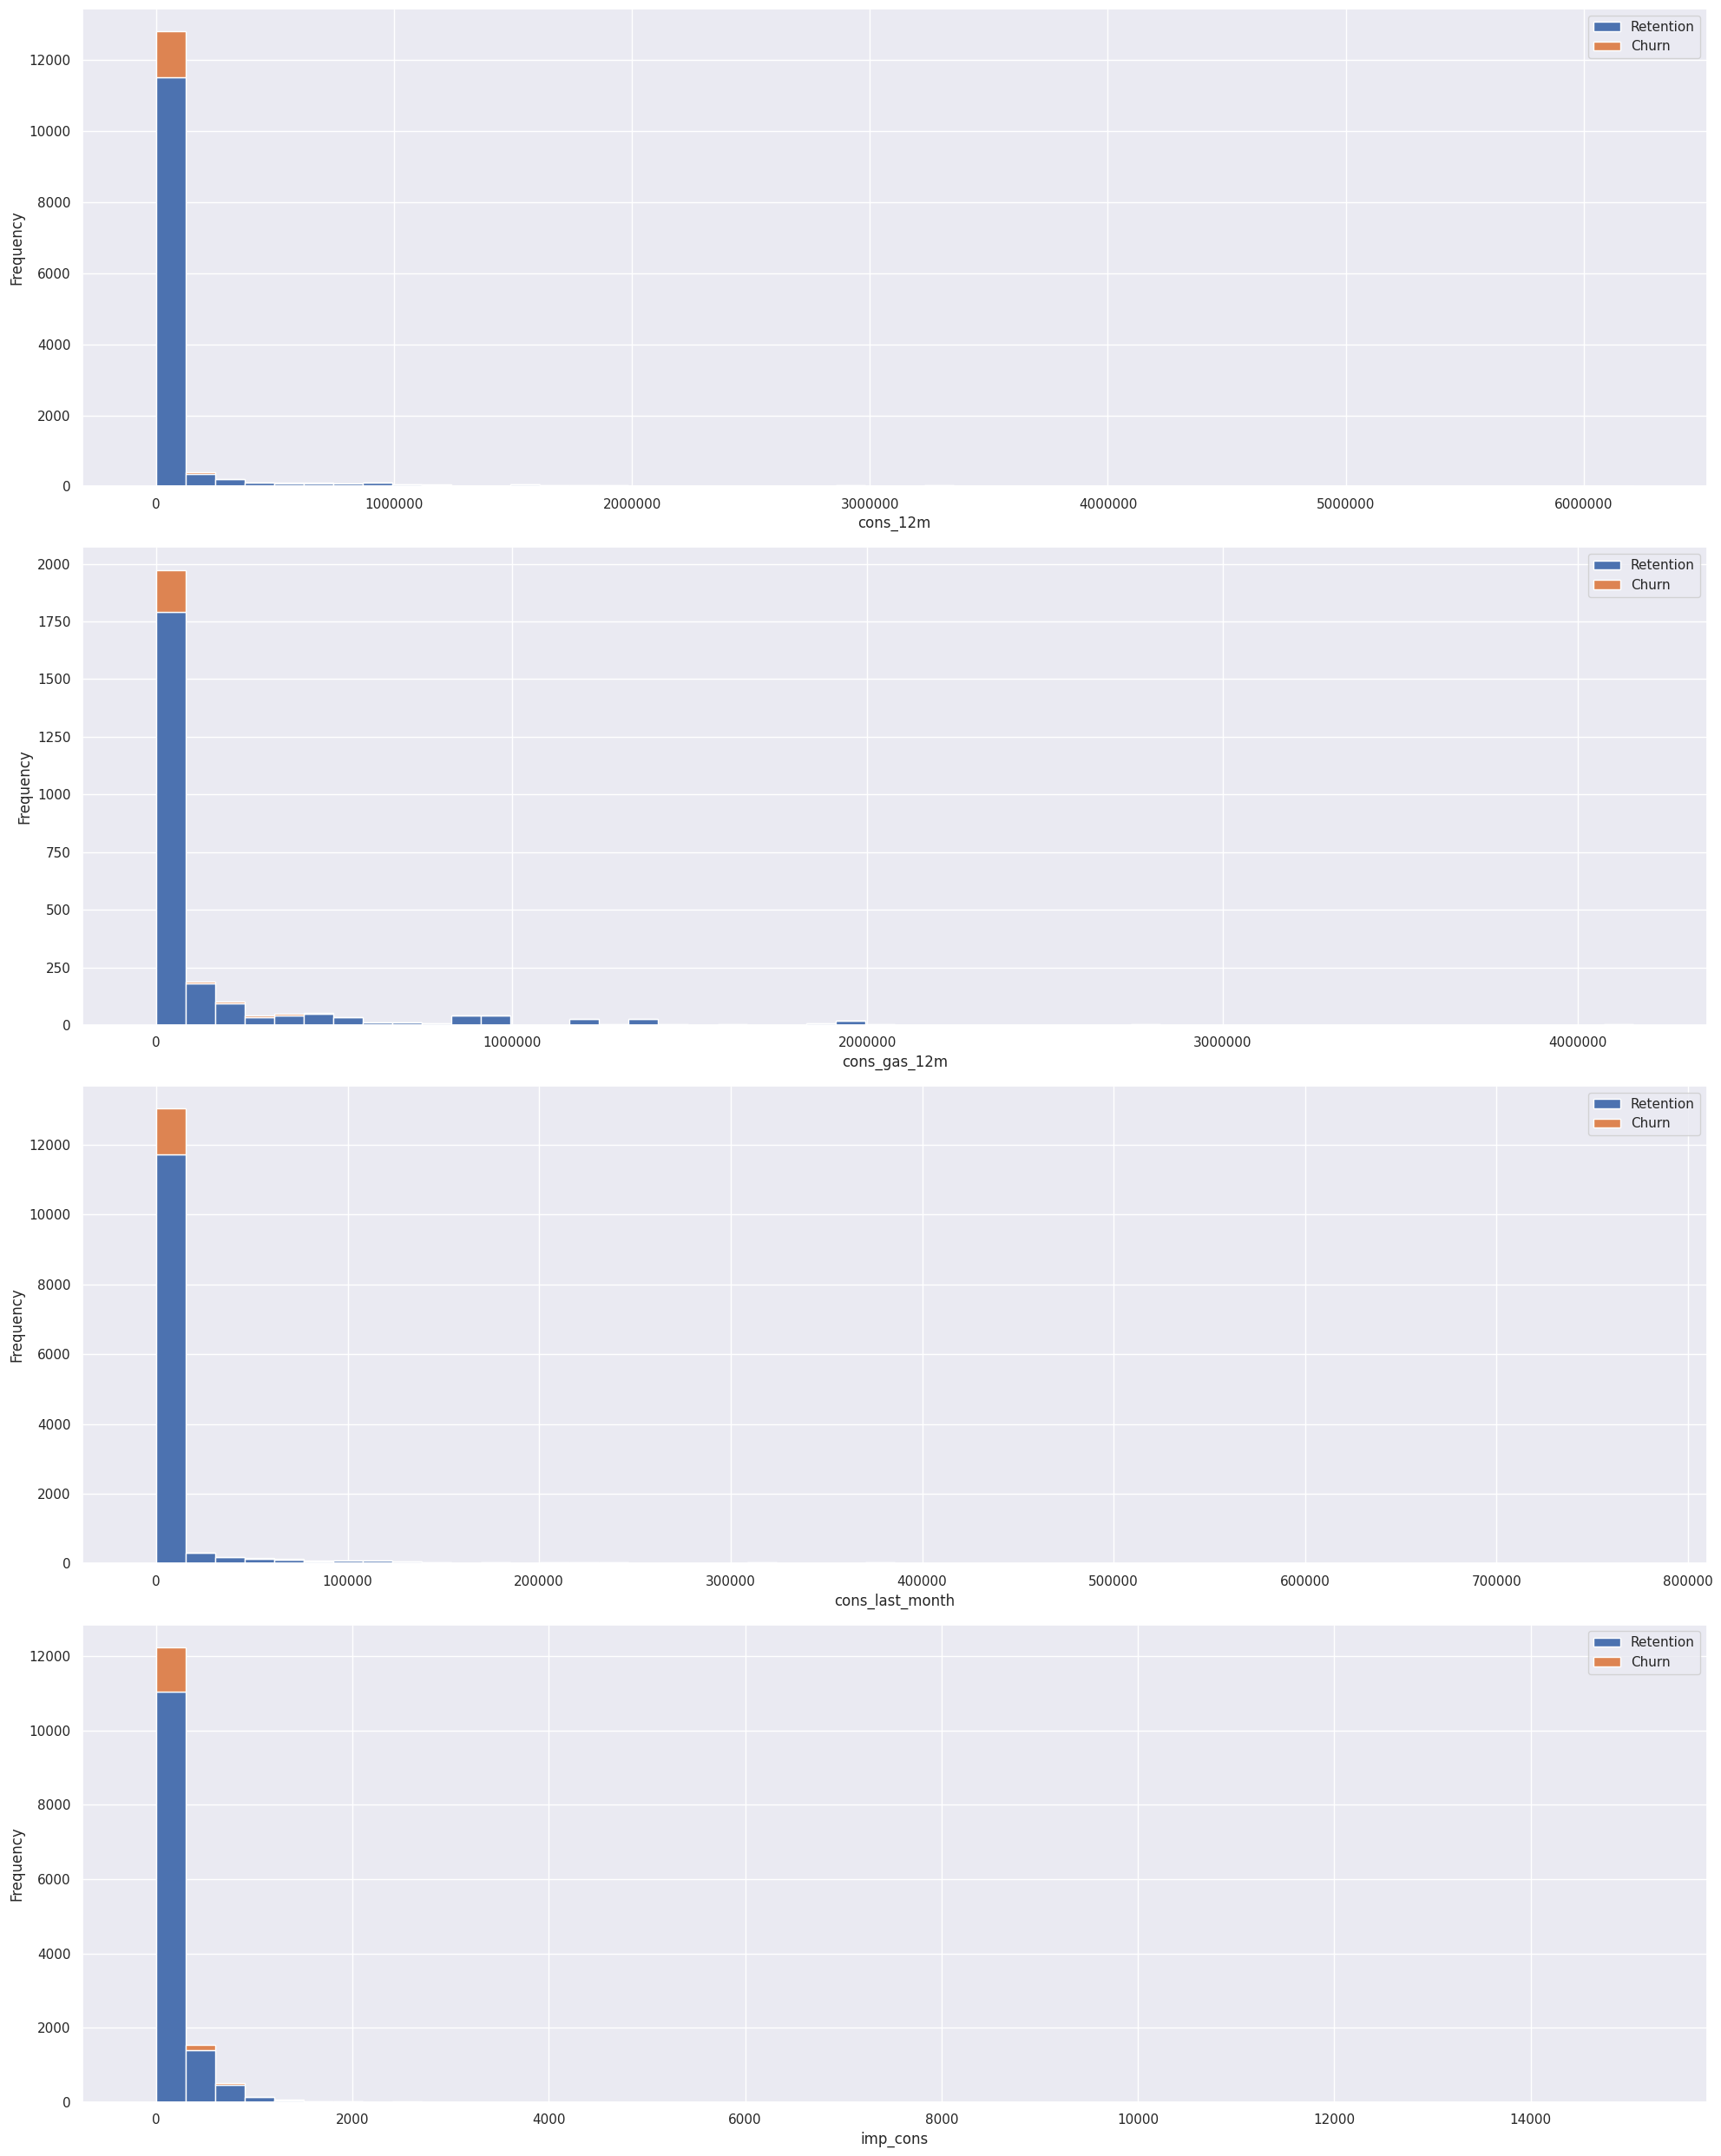

In [24]:
fig, axs = plt.subplots(nrows=4, figsize=(20,25))

plot_distribution(consumption, "cons_12m", axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

## Churn Status Among Gas Users

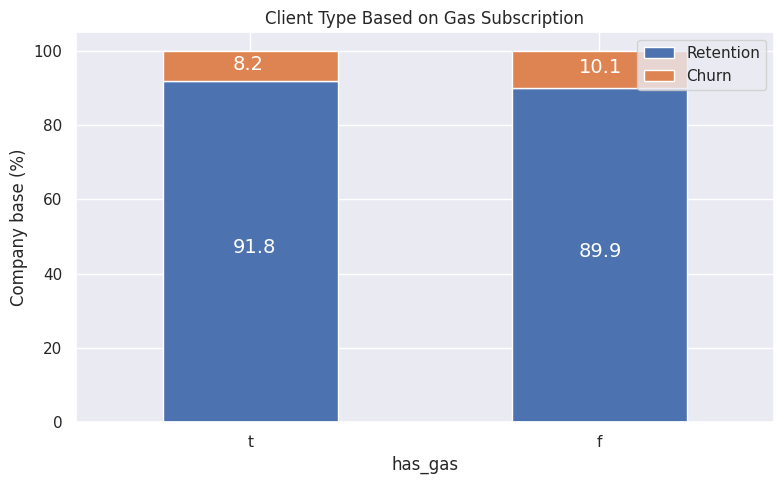

In [25]:
# Extract relevant columns for analysis
gas_client_status = client_df[["id", "has_gas", "churn"]]

# Group by churn status and gas usage, then count the number of clients
gas_client_count = gas_client_status.groupby([gas_client_status["churn"], gas_client_status["has_gas"]])["id"].count().unstack(level=0)

# Calculate the percentage of clients and sort the values by churn status
gas_client_pct = (gas_client_count.div(gas_client_count.sum(axis=1), axis=0) * 100).sort_values(by=[1])

# Plot the stacked bar chart
plot_stacked_bars(gas_client_pct, "Client Type Based on Gas Subscription", (8, 5))

## Churn Status by Subscribed Power

(0.0, 70.0)

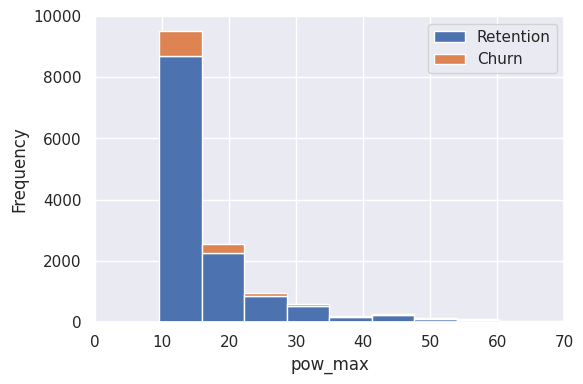

In [26]:
power = client_df[["id", "pow_max", "churn"]]
fig, ax = plt.subplots(nrows=1, figsize = (6,4))
plot_distribution(power, 'pow_max', ax)
ax.set_xlim(0, 70) 

## Churn Status by Antiquity of the Client

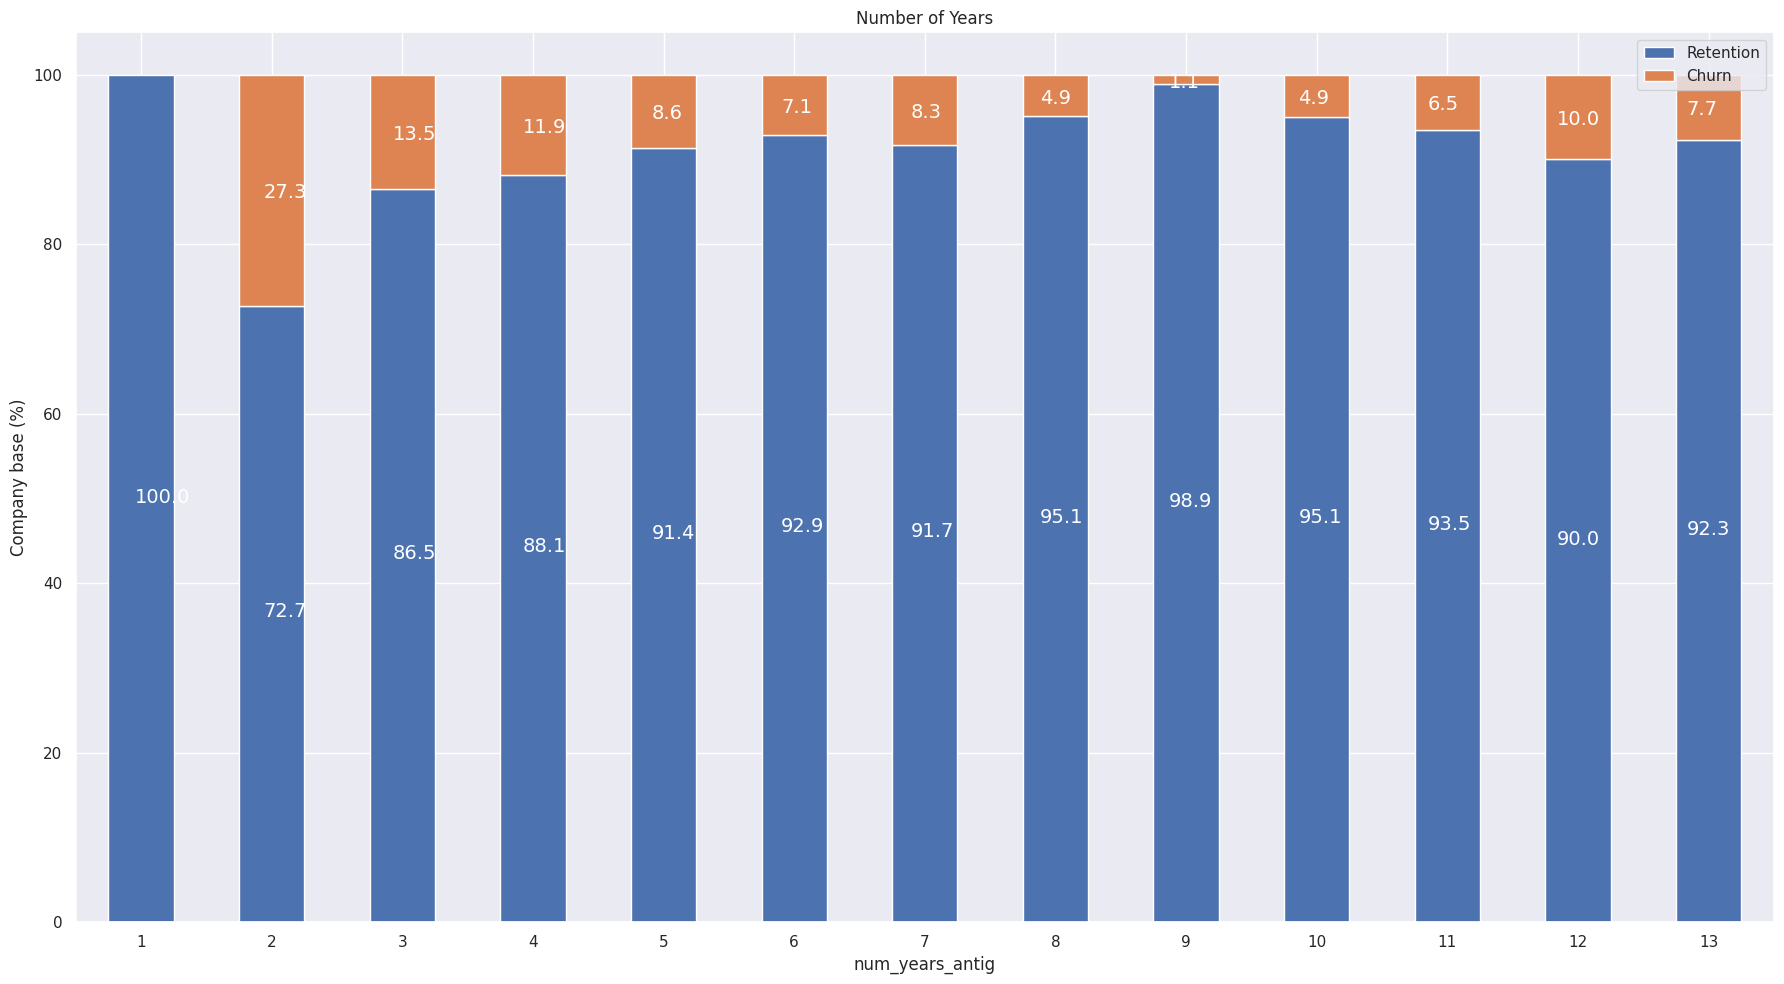

In [27]:
antig_years = client_df[["id", "num_years_antig", "churn"]]
antig = antig_years.groupby([antig_years["num_years_antig"], antig_years["churn"]])["id"].count().unstack(level=1)
antig_pct = (antig.div(antig.sum(axis=1), axis=0) * 100)
plot_stacked_bars(antig_pct, "Number of Years")

## Variance of Mean Prices Over Time for Each Company for Year

In [28]:
var_year = price_df.groupby(["id", "price_date"]).mean().groupby(['id']).var().reset_index()

In [29]:
var_year = var_year.rename(columns = {
"price_off_peak_var": "var_year_price_p1_var",
"price_peak_var": "var_year_price_p2_var",
"price_mid_peak_var": "var_year_price_p3_var",
"price_off_peak_fix": "var_year_price_p1_fix",
"price_peak_fix": "var_year_price_p2_fix",
"price_mid_peak_fix": "var_year_price_p3_fix"
})
#var_year.head()
# Calculate the total variance of prices for each company (id) by summing up the variances of energy and power prices
var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]

## Variance of Mean Prices Over Six Months for Each Company

In [30]:
var_6m = price_df[price_df["price_date"] > "2015-06-01"].groupby(["id", "price_date"]).mean().groupby(["id"]).var().reset_index()

In [31]:
var_6m = var_6m.rename(columns = {
"price_off_peak_var": "var_6m_price_p1_var",
"price_peak_var": "var_6m_price_p2_var",
"price_mid_peak_var": "var_6m_price_p3_var",
"price_off_peak_fix": "var_6m_price_p1_fix",
"price_peak_fix": "var_6m_price_p2_fix",
"price_mid_peak_fix": "var_6m_price_p3_fix"
} )

var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]
var_6m.head()

,id,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


In [32]:
# merging var_year and var_6m 
price_features = pd.merge(var_year, var_6m, on = 'id')

In [33]:
# merging price features with client df churn 
price_analysis = pd.merge(price_features, client_df[["id", "churn"]], on = "id")
price_analysis.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


## Correlation Analysis of Price Data

Data Types:
 id                        object
var_year_price_p1_var    float64
var_year_price_p2_var    float64
var_year_price_p3_var    float64
var_year_price_p1_fix    float64
var_year_price_p2_fix    float64
var_year_price_p3_fix    float64
var_year_price_p1        float64
var_year_price_p2        float64
var_year_price_p3        float64
var_6m_price_p1_var      float64
var_6m_price_p2_var      float64
var_6m_price_p3_var      float64
var_6m_price_p1_fix      float64
var_6m_price_p2_fix      float64
var_6m_price_p3_fix      float64
var_6m_price_p1          float64
var_6m_price_p2          float64
var_6m_price_p3          float64
churn                      int64
dtype: object

First Few Rows:
                                  id  var_year_price_p1_var  \
0  0002203ffbb812588b632b9e628cc38d               0.000016   
1  0004351ebdd665e6ee664792efc4fd13               0.000005   
2  0010bcc39e42b3c2131ed2ce55246e3c               0.000676   
3  00114d74e963e47177db89bc70108537            

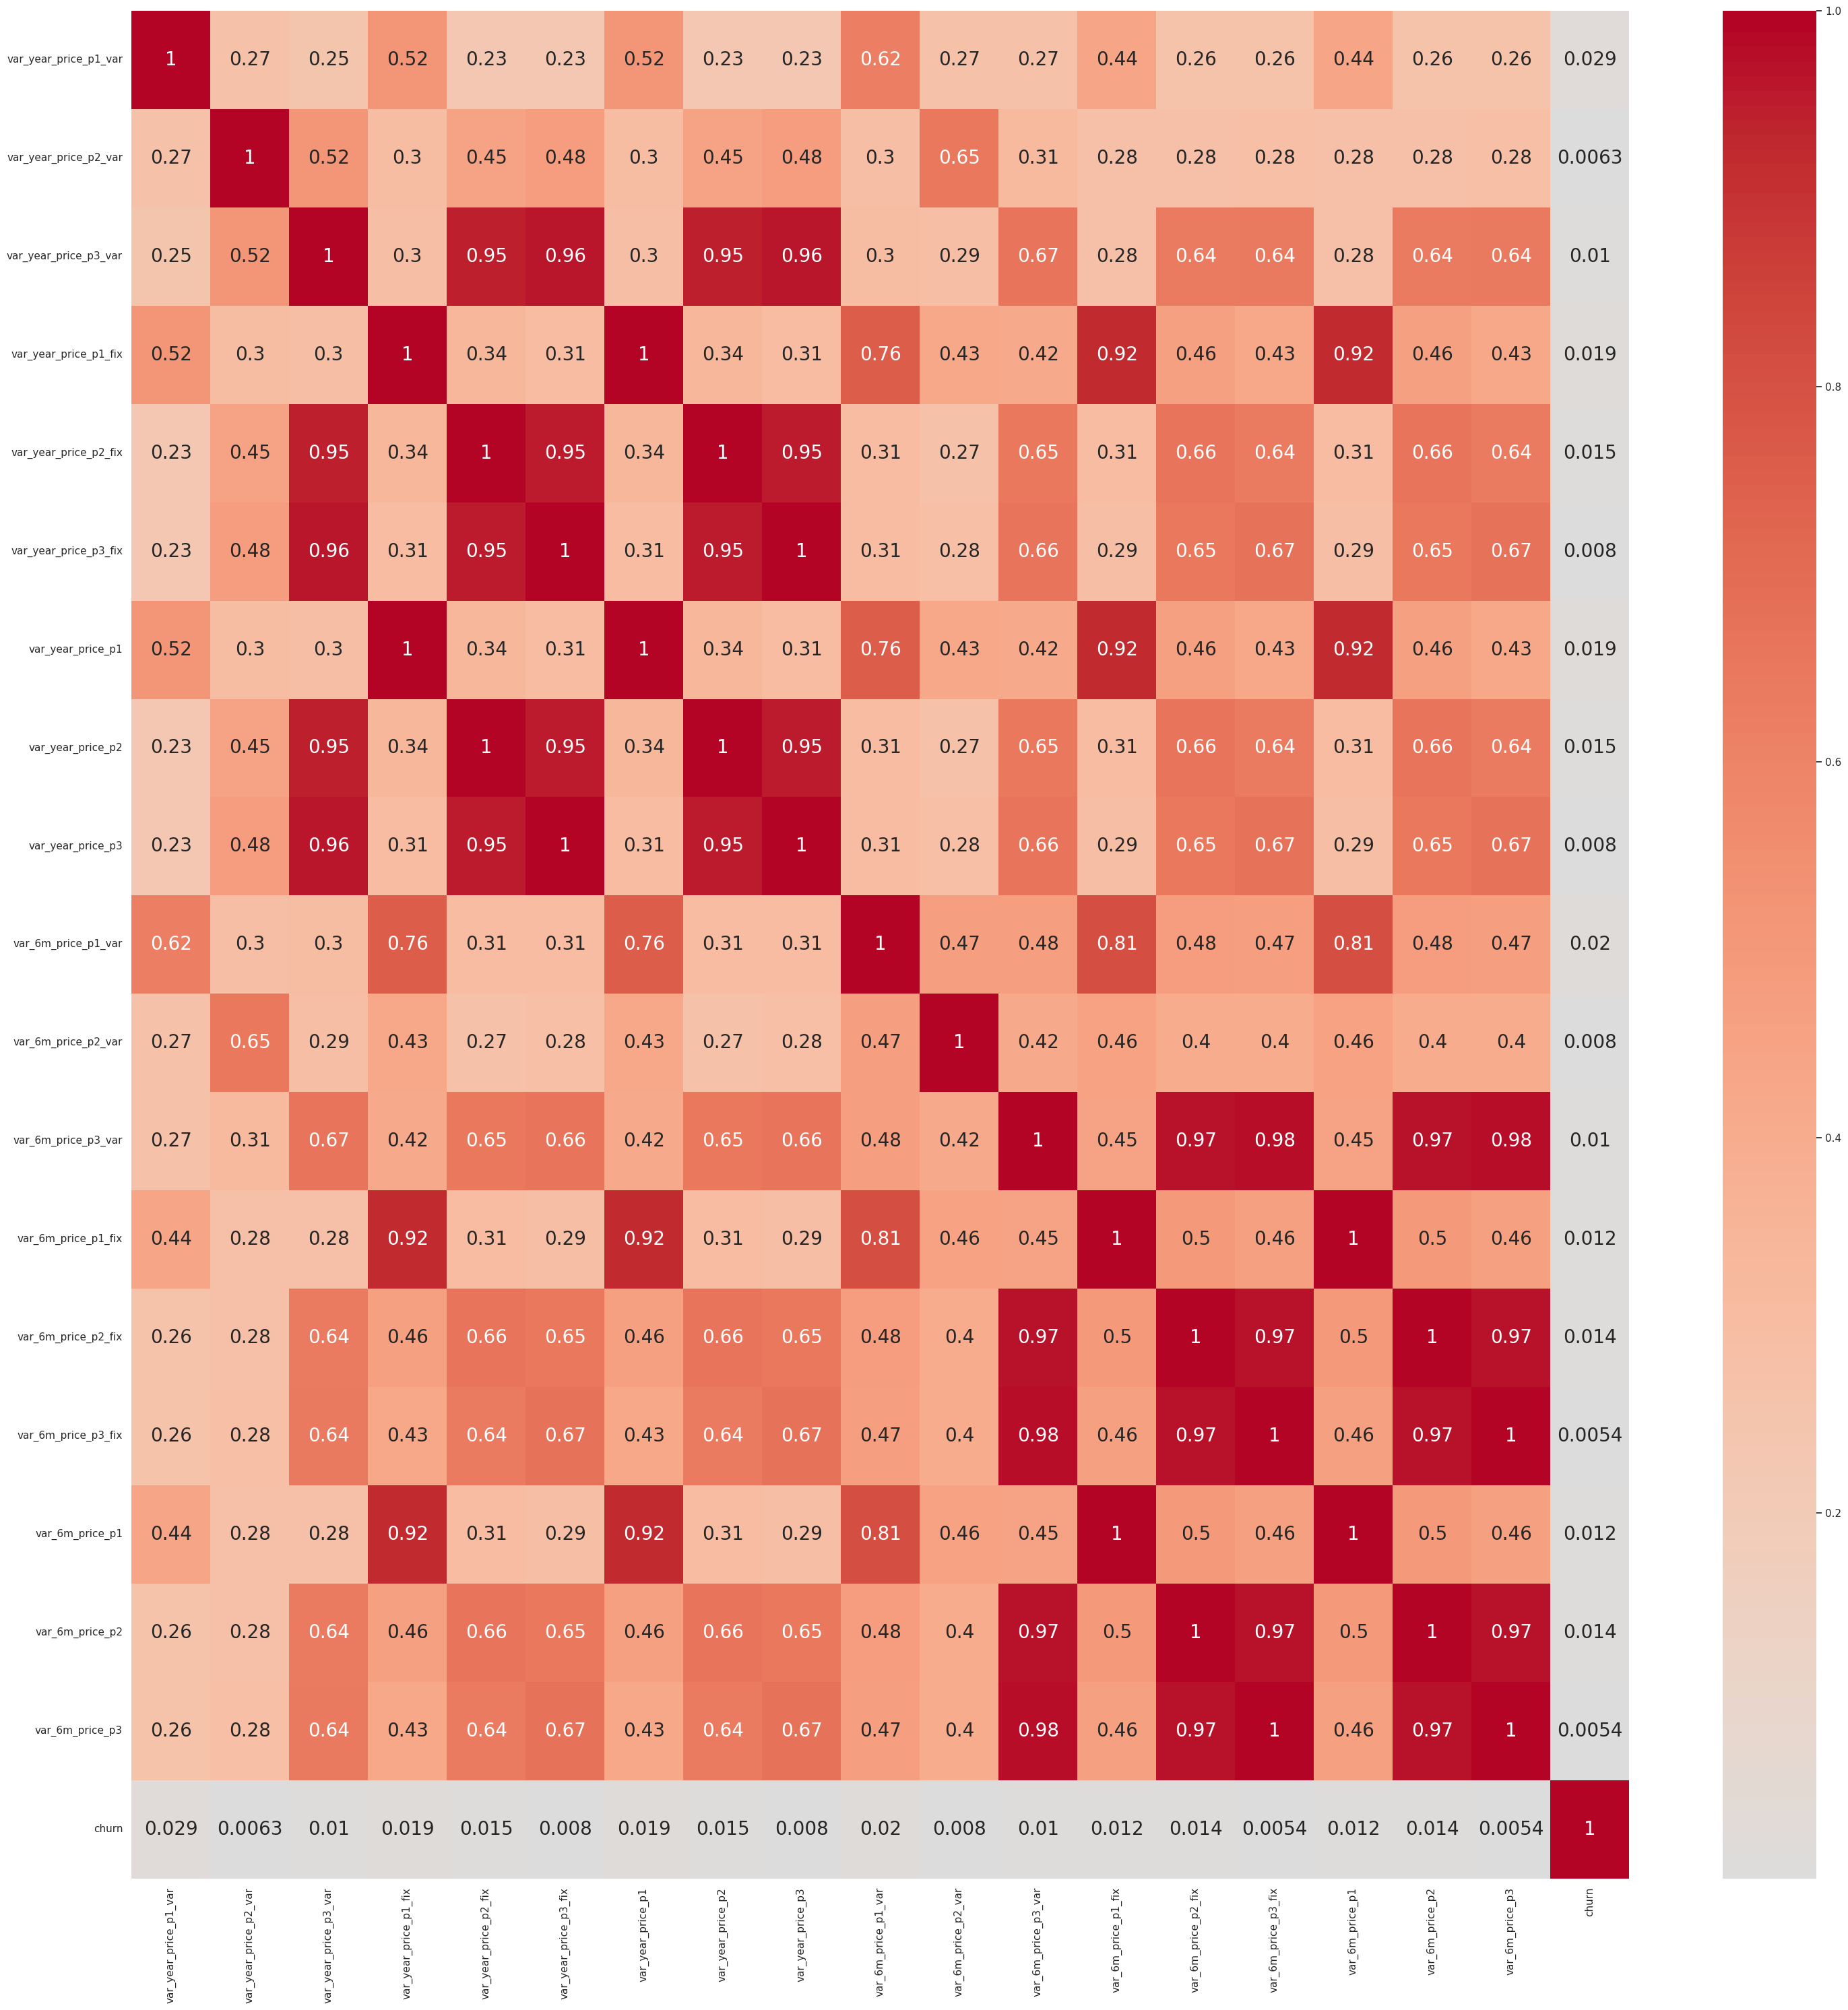


Correlation Matrix:
                        var_year_price_p1_var  var_year_price_p2_var  \
var_year_price_p1_var               1.000000               0.268477   
var_year_price_p2_var               0.268477               1.000000   
var_year_price_p3_var               0.245311               0.515645   
var_year_price_p1_fix               0.515049               0.298254   
var_year_price_p2_fix               0.227269               0.451123   
var_year_price_p3_fix               0.229893               0.475760   
var_year_price_p1                   0.515064               0.298256   
var_year_price_p2                   0.227272               0.451135   
var_year_price_p3                   0.229894               0.475761   
var_6m_price_p1_var                 0.619343               0.295638   
var_6m_price_p2_var                 0.265968               0.647083   
var_6m_price_p3_var                 0.269555               0.312539   
var_6m_price_p1_fix                 0.441878           

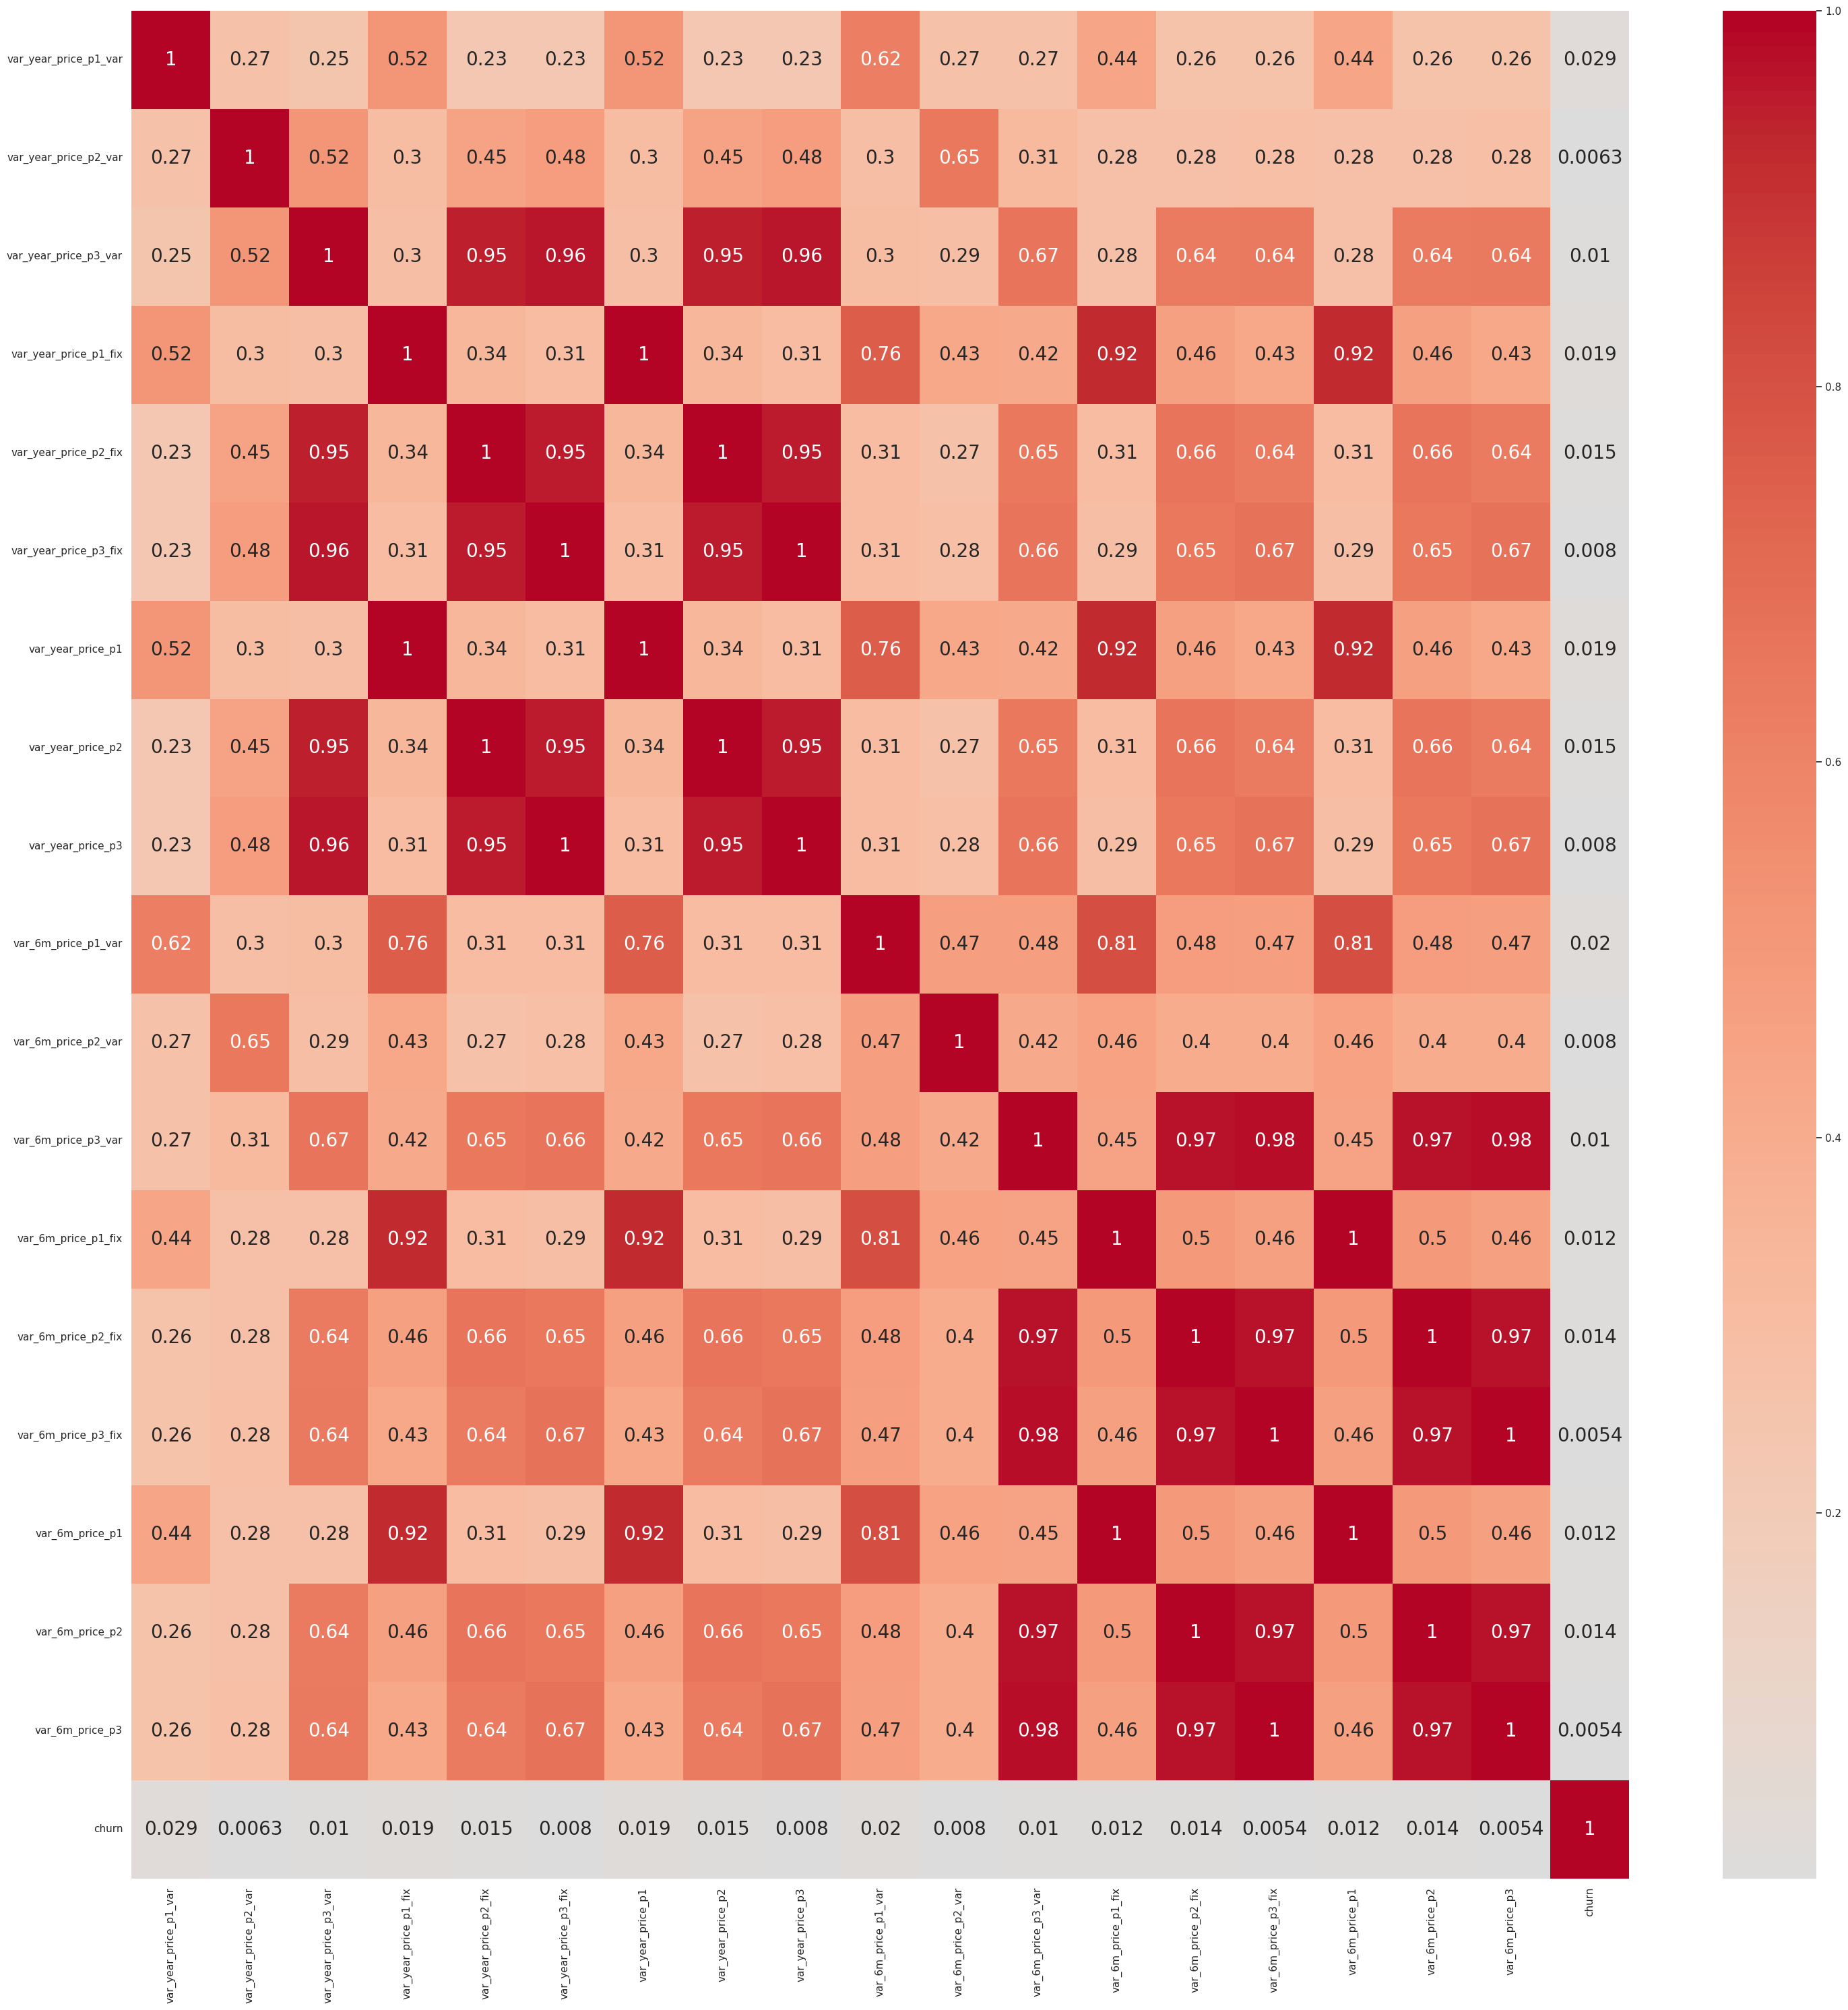

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline mode for Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline mode for Jupyter
%matplotlib inline

# Check the data types and the first few rows of price_analysis
print("Data Types:\n", price_analysis.dtypes)
print("\nFirst Few Rows:\n", price_analysis.head())

# Filter out non-numeric columns for correlation analysis
numeric_columns = price_analysis.select_dtypes(include=['number'])

# Check the numeric columns
print("\nNumeric Columns:\n", numeric_columns.head())

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Print the correlation matrix to debug
print("\nCorrelation Matrix:\n", corr)

# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, annot_kws={'size': 20}, cmap='coolwarm', center=0)
plt.show()

# Filter out non-numeric columns for correlation analysis
numeric_columns = price_analysis.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Print the correlation matrix to debug
print("\nCorrelation Matrix:\n", corr)

# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True, annot_kws={'size': 20}, cmap='coolwarm', center=0)
plt.show()


In [35]:
merged_data = pd.merge(client_df.drop(columns=["churn"]), price_analysis, on ="id" )
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


### In this exploratory data analysis (EDA),we explored and visualized various features that contribute to customer churn.


In [37]:
df = pd.read_csv('/kaggle/input/bcg-task-3-dataset/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [38]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

In [39]:
price_df = pd.read_csv('/kaggle/input/eda-bcg-forage-dataset/price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [40]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Contract Duration: Determine the length of the contract by computing the difference between the activation date and the end date. Contracts with shorter durations may suggest a greater propensity for churn.

In [41]:
# Convert date columns to datetime format
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

# Calculate duration of connection
df["duration"] = df["date_end"] - df["date_activ"]
df["duration"] = df["duration"].astype(int)
# Get today's date as a Timestamp object
today_date = pd.Timestamp.today()

# Calculate time elapsed since the last modification and renewal dates
df["since_last_mod"] = today_date - df["date_modif_prod"]
df["since_renewal"] = today_date - df["date_renewal"]
# Convert timedelta columns to integers
df["since_last_mod"] = df["since_last_mod"].astype(int)
df["since_renewal"] = df["since_renewal"].astype(int)

In [42]:
client_df = pd.read_csv('/kaggle/input/eda-bcg-forage-dataset/client_data (1).csv')

client_df["date_activ"] = pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'],format='%Y-%m-%d')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [44]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,duration,since_last_mod,since_renewal
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000,1.460600e+04,1.460600e+04,1.460600e+04
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152,1.734512e+17,3.610778e+17,2.807456e+17
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.315840e+16,2.641819e+17,2.642683e+17
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,1.262304e+17,2.837947e+17,2.721307e+17
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000,1.579824e+17,3.466075e+17,2.802523e+17
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000,2.032992e+17,4.366363e+17,2.889787e+17
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000,4.142880e+17,6.657691e+17,3.460027e+17
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175,5.226126e+16,7.970166e+16,1.023071e+16


In [45]:
df.describe(include = object)

,id,channel_sales,has_gas,origin_up
count,14606,14606,14606,14606
unique,14606,8,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,11955,7097


In [46]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format = "%y-%m-%d")
price_df.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [47]:
### Average Price change across periods
#Calculating average price changes across individual periods, instead of the entire year.
mean_prices = price_df.groupby(['id']).agg({
'price_off_peak_var': 'mean',
'price_peak_var': 'mean',
'price_mid_peak_var': 'mean',
'price_off_peak_fix': 'mean',
'price_peak_fix': 'mean',
'price_mid_peak_fix': 'mean'
})

In [48]:
# Calculate the mean differences between consecutive periods 
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices["price_off_peak_var"] - mean_prices["price_peak_var"]
mean_prices["peak_mid_peak_var_mean_diff"] = mean_prices["price_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_mid_peak_var_mean_diff"] = mean_prices["price_off_peak_var"] - mean_prices["price_mid_peak_var"]
mean_prices["off_peak_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_peak_fix"]
mean_prices["peak_mid_peak_fix_mean_diff"] = mean_prices["price_peak_fix"] - mean_prices["price_mid_peak_fix"]
mean_prices["off_peak_mid_peak_fix_mean_diff"] = mean_prices["price_off_peak_fix"] - mean_prices["price_mid_peak_fix"]

In [49]:
mean_prices.reset_index(inplace=True)

In [50]:
columns = [
'id',
'off_peak_peak_var_mean_diff',
'peak_mid_peak_var_mean_diff',
'off_peak_mid_peak_var_mean_diff',
'off_peak_peak_fix_mean_diff',
'peak_mid_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff'
]

#merging df and price_df
df = pd.merge(df, mean_prices[columns], on = 'id')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

## Client Retention

In [51]:
#Convert date columns to datetime
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

# Finding tenure of customers in years
client_df['tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days / 365.25
client_df['tenure'] = client_df['tenure'].astype(int)

print(client_df[['date_activ', 'date_end', 'tenure']].head())

  date_activ   date_end  tenure
0 2013-06-15 2016-06-15       3
1 2009-08-21 2016-08-30       7
2 2010-04-16 2016-04-16       6
3 2010-03-30 2016-03-30       6
4 2010-01-13 2016-03-07       6


# Model Implementation

## Load data for prediction

In [53]:
df = pd.read_csv('/kaggle/input/bcg-task4-dataset/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model, here, Random Forest.

In [54]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

In [55]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [58]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9038882803943045
Precision: 0.8260869565217391
Recall: 0.05191256830601093
F1 Score: 0.09768637532133675
ROC AUC Score: 0.5253476414262861


# Conclusion/ Executive Summary

### Situation
• Customer churn is a critical concern for businesses, impacting revenue and growth.
• The client, a leading energy company, faces a churn rate of approximately 10%.

### Complication
• Existing strategies may not effectively address the diverse factors contributing to churn.
• Without proactive intervention, the client risks revenue loss and decreased market 
competitiveness.

### Model Solution
• Predictive model is able to predict churn but the main driver is not customer price sensitivity, 
instead yearly consumption, forecasted consumption and net margin are the 3 largest 
drivers
• Implementing a Random Forest classifier, a predictive model with 90% 
accuracy was developed.
• Leveraging advanced machine learning techniques, enables targeted interventions, 
driving cost savings and revenue preservation.

### Recommendation
• Offer discount to only to high-value customers with high churn probability.

### Impact
• The solution empowers the client to proactively identify and retain at-risk customers, 
safeguarding their bottom line and fostering sustained business growth.